# Pretrained Model, classification, Elastic Net

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/Innolab/Github') 

Mounted at /content/drive


In [2]:
from src.preprocessing.preprocessing_matlab_files import preprocess_mat_files
from src.preprocessing.data_preparation import prepare_data

In [3]:
matlab_dir = "/content/drive/MyDrive/Colab Notebooks/Innolab/Matlab Files" # Enter the directory for the matlab files
excel_path = "/content/drive/MyDrive/Colab Notebooks/Innolab/DELCODE_dataset.xlsx" # Enter the directory for the corresponding excel sheet
write_dir = "/content/drive/MyDrive/Colab Notebooks/Innolab/write" # ...
export_file = False # rename to export file
preprocessing_type = 'aggregation' 

df = preprocess_mat_files(matlab_dir = matlab_dir, excel_path = excel_path, write_dir = write_dir,
                           export_file = export_file, preprocessing_type = preprocessing_type, statistic = 'mean')

loading files
Starting Preprocessing
Creating Final Dataset
Done!


In [4]:
df

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,1_1,1_2,1_3,1_4,1_5,1_6,1_7,2_2,2_3,2_4,2_5,2_6,2_7,3_3,3_4,3_5,3_6,3_7,4_4,4_5,4_6,4_7,5_5,5_6,5_7,6_6,6_7,7_7
0,1,0a8d02f2b,11,66,17.08.2016,0,2,17,0.054016,0.0,1.0,0.059918,-0.038175,0.013602,-0.007439,0.072988,0.035254,0.005983,0.021569,0.538193,0.359326,0.409272,0.099061,0.155599,0.219386,0.161535,0.621305,0.430063,0.333243,0.092059,0.213101,0.191816,0.532068,0.174604,0.106723,0.326073,0.221852,0.322626,0.020247,0.159319,0.150326,0.175592,0.081184,0.105608,0.355734,0.317396,0.349668
1,2,0a71a953d,17,72,30.03.2015,0,1,20,-0.468749,1.0,2.0,0.10496,-0.027038,0.020629,-0.002622,0.019785,-0.023587,0.012025,0.052178,0.507799,0.359254,0.361147,0.049819,0.130366,-0.137414,0.04217,0.671531,0.473377,0.367554,0.140397,-0.002806,0.095852,0.459918,0.188397,0.030068,0.023321,0.034736,0.384345,0.135988,0.102555,0.07141,0.322519,-0.043426,0.090363,0.192952,0.105353,0.240881
2,3,0a61339db,11,72,13.05.2015,1,1,16,-0.093521,0.0,3.0,0.07133,0.005331,0.012895,0.026959,0.023896,0.026039,0.033056,0.021831,0.199761,0.074975,0.071457,-0.01712,0.052231,0.00726,0.049056,0.303302,0.190495,0.17687,0.03085,0.020871,-0.008662,0.266599,0.142112,0.027551,0.117675,-0.00927,0.203192,-0.014111,0.051064,-0.016667,0.145192,0.057935,0.06542,0.152252,0.080831,0.19634
3,4,0b28aed58,17,76,18.01.2016,0,1,20,0.466027,0.0,4.0,0.188084,0.052211,-0.111568,-0.09,0.029541,0.036005,0.035995,0.083385,0.482514,0.024467,-0.107833,0.03448,0.060489,-0.116487,0.093149,0.313839,0.182987,0.212667,-0.025838,-0.009318,-0.052479,0.246719,0.081127,-0.046371,0.104513,-0.019481,0.277193,-0.021194,0.038132,-0.001597,0.12639,-0.001889,0.064197,0.17999,0.118052,0.227498
4,5,0c1c5ae77,8,64,12.03.2015,1,1,13,1.452099,0.0,5.0,0.132788,0.04202,0.09332,0.060415,0.066898,0.022056,0.051668,0.080887,0.205802,-0.009584,0.094284,0.054277,0.037151,0.15134,0.174541,0.238345,0.136062,0.16104,-0.017533,0.086181,0.09898,0.252812,0.137191,-0.008658,0.242225,0.125819,0.191427,-0.021946,0.161507,0.138011,0.1411,0.009321,0.092701,0.30901,0.235893,0.37739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,906,f816d269a,16,84,2017-11-21,2,3,18,-2.388095,0.0,906.0,0.136389,-0.023649,-0.002348,-0.07102,0.079082,0.033848,0.001036,0.069726,0.545994,0.194554,0.221084,0.132955,-0.041355,0.089987,0.066649,0.27206,0.221954,0.15329,-0.021906,0.093227,0.013773,0.247335,0.072557,-0.043635,0.122286,-0.007813,0.180578,-0.003443,0.078697,0.061495,0.229756,0.035669,0.053695,0.155652,0.11343,0.156167
905,907,f98419539,5,71,2014-09-11,2,3,13,-1.860675,1.0,907.0,0.178495,-0.096916,0.058761,-0.039244,0.122438,0.031171,0.042034,0.026155,0.290446,-0.056688,-0.056182,-0.144704,0.02513,-0.05151,-0.009278,0.225529,0.038229,0.20374,-0.01182,-0.006614,0.016697,0.253735,0.013468,-0.005859,0.067822,-0.058574,0.410099,-0.045411,0.088022,0.08374,0.220006,0.010572,0.065844,0.178566,0.066199,0.169795
906,908,fade343c8,8,78,2015-11-23,2,3,8,-1.868184,1.0,908.0,0.097265,-0.026466,-0.028496,-0.019094,0.018134,0.067899,0.024621,0.035075,0.178263,0.056536,0.053847,-0.008416,0.00087,-0.012427,0.012002,0.161124,0.091493,0.08265,0.008871,-0.021607,-0.041121,0.147687,0.024451,-0.011598,0.081368,0.016668,0.137266,0.002639,-0.02314,-0.028287,0.112552,-0.016535,-0.012336,0.127273,0.094503,0.102097
907,909,fbc8a48a0,14,61,2017-03-20,2,3,9,-2.432351,0.0,909.0,0.131525,-0.043982,0.079655,-0.051607,0.117778,0.101683,0.019386,0.078948,0.163418,-0.094566,0.056415,-0.041263,-0.068523,0.020028,-0.034854,0.430648,0.096152,0.308294,0.093714,-0.058784,-0.10513,0.167568,0.071621,-0.072117,0.017321,-0.143462,0.324986,0.095204,0.018929,-0.069679,0.194042,0.028932,0.10987,0.101379,0.069668,0.249134


In [5]:
classification = True
columns_drop = ["ConnID", "Repseudonym", "siteid", "visdat", "MEM_score", "Apoe", "IDs"]
target = "prmdiag"
y_0 = [0]
y_1 = [2, 3]
train_size = 0.8
seed = 1855
split = True

In [6]:
# preparation of data
ytrain, Xtrain, ytest, Xtest = prepare_data(data = df, classification = classification,
                         columns_drop = columns_drop, target = target, y_0 = y_0, y_1 = y_1,
                         train_size = train_size, seed = seed, split = split)


pd.concat([ytrain, Xtrain], axis = 1) # test data

,y,age,sex,edyears,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,1_1,1_2,1_3,1_4,1_5,1_6,1_7,2_2,2_3,2_4,2_5,2_6,2_7,3_3,3_4,3_5,3_6,3_7,4_4,4_5,4_6,4_7,5_5,5_6,5_7,6_6,6_7,7_7
855,1.0,-0.295663,0.497994,-0.380863,0.019158,-1.692190,-0.328538,-1.007199,0.133464,-0.542259,-0.553467,-2.359331,0.450013,-0.945169,-0.210106,-1.294661,-0.370042,0.142360,0.798092,-1.441613,-2.066615,-1.335625,-0.657344,-0.426101,0.299000,-0.719943,-1.338390,-1.142457,-0.234808,-0.354903,-0.844188,-0.207006,0.266139,0.230467,-0.935608,-0.471788,-0.193991,-0.955258,-0.934376,0.007805
387,1.0,-0.784678,0.497994,-1.030316,-0.565231,0.298264,0.288732,-0.167757,-0.099764,-0.774581,-1.834673,-1.342097,-0.804957,0.301644,-0.802462,0.356659,-0.600779,-0.810394,-0.663822,-0.444918,-0.767074,-0.738908,-0.307513,-1.253660,-0.479991,-0.664292,-0.295554,0.429207,-0.689973,-0.772385,-0.181135,0.456722,-2.323442,-0.957305,-0.889538,-0.986187,-1.385919,0.155991,-0.933557,-0.864433
857,1.0,0.519362,0.497994,-0.705589,-0.734496,-0.255060,-0.411503,0.251434,-1.218397,0.148426,-0.430990,-0.411799,-0.028100,1.577650,0.877158,0.226716,0.040504,-0.779541,-1.116523,2.024770,1.135770,-0.568719,0.631908,-1.023606,-0.948749,0.323026,-0.027468,-0.657567,-0.781738,-0.914507,-1.696602,-0.155507,-0.750753,-0.591951,-0.875242,-1.871272,-0.537325,-0.829447,-1.600357,-1.555841
755,1.0,-0.784678,-1.130230,-0.380863,-1.148525,1.003051,0.974634,0.480512,0.374056,0.945590,0.968932,1.302772,1.526813,3.691590,3.387548,3.997133,3.795401,5.068863,5.874734,2.941833,3.723473,2.282382,4.938205,5.293353,6.271124,1.926511,2.623819,3.945669,3.698386,4.755195,0.145479,4.029115,3.573358,3.661101,2.049498,4.933084,3.799829,2.214653,3.982404,2.922242
580,1.0,0.519362,0.497994,-0.380863,0.256108,1.079019,0.676474,0.983798,0.188971,0.856290,0.925020,1.193920,-1.305912,0.054504,-0.325714,0.942594,-0.345222,0.705745,0.818349,-0.078919,0.556068,0.536037,0.388778,1.457969,1.168444,-0.351617,1.460111,0.124906,0.544798,1.422588,0.355988,-0.200966,1.269696,0.882793,-0.509437,0.137861,-0.059476,-0.496444,0.419167,-0.562552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,-1.599703,0.497994,-0.380863,-1.394285,0.984089,0.788511,0.143659,-0.422239,-0.132421,-1.162446,-0.239879,-0.850044,-1.164173,-1.174525,-1.118640,0.610382,-0.057341,0.532292,0.229769,-0.044097,1.699802,-1.173067,-0.655413,-0.843082,0.329813,-0.138220,-0.640553,0.398275,-0.343417,1.539237,-1.775968,-1.651808,-1.654496,-0.826153,0.060819,0.528233,-0.187051,-0.412374,0.070328
339,0.0,0.030347,0.497994,-0.705589,0.053136,-0.581195,-0.294275,1.314454,-0.030462,-1.072378,1.081612,-0.692839,-0.680053,0.021772,0.025498,-0.280925,0.435491,0.027212,0.401574,0.467212,0.703056,0.574625,0.554941,-1.667832,-1.590989,1.326674,1.448927,2.031330,-0.006503,-0.287719,-0.040972,-0.142016,-1.130349,-1.314795,-0.593748,0.795890,0.214265,1.592344,1.928979,0.967263
200,0.0,-0.947683,0.497994,0.593317,-0.180801,1.296963,2.130588,2.113022,2.084469,0.260478,1.175986,-0.206562,-0.227333,0.460708,0.612702,2.154602,0.155231,2.067931,1.227252,-0.306257,0.672048,1.165625,0.762168,1.346034,0.507625,0.546527,1.960002,0.459864,0.678797,-0.116618,1.999829,0.229440,0.278945,-0.429835,-0.920597,1.505709,0.917169,-0.058171,0.458292,0.805978
148,1.0,0.193352,-1.130230,1.567496,0.210392,0.311620,-0.045480,-0.432597,0.131049,-1.189476,-0.217661,-0.332566,-1.277631,-1.029763,-1.497378,-0.300650,0.907148,0.187012,0.318631,-1.502993,-0.159786,-0.931802,-1.900990,0.579514,-0.333055,-1.364848,-0.177835,-3.070094,-0.658039,-0.221546,-1.245914,-2.728863,-0.432836,-0.443183,1.986971,-0.896918,-0.589715,-1.642574,-0.745331,-1.540431


# Train Model
Evaluate AUC and accuracy on test data

In [ ]:
from src.models.pipeline_elastic_net import model_elastic_net
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
model = model_elastic_net(X_train = Xtrain, y_train = ytrain, 
                          classification = True, 
                          n_alphas_logreg = 10, 
                          l1_ratios_logreg= np.linspace(0,  1, 11).tolist(), 
                          cv_logreg = 5,
                          max_iter = 500) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [ ]:
predictions = model.predict(Xtest)
accuracy_score(ytest, predictions)

0.7446808510638298

In [ ]:
pred_prob = model.predict_proba(Xtest)
auc = roc_auc_score(ytest, pred_prob[:, 1])
auc

0.8414918414918414

In [ ]:
model.l1_ratio_

array([0.2])

In [ ]:
model.C_

array([0.04641589])

# Save Model

In [7]:
import pickle

In [ ]:
filename ='pretrained_elnet_class_agg_mean.sav'
pickle.dump(model, open(filename, 'wb'))

# Evaluation

In [8]:
# load model
model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Innolab/pretrained_elnet_class_agg_mean.sav", 'rb'))

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
predictions = model.predict(Xtest)

In [ ]:
 precision_score(ytest, predictions)

0.8163265306122449

In [ ]:
recall_score(ytest, predictions)

0.7272727272727273

In [ ]:
f1_score(ytest, predictions)

0.7692307692307693

# Visualisation coefficients

In [4]:
from src.visualization.viz_utils import plot_coef_elastic_net

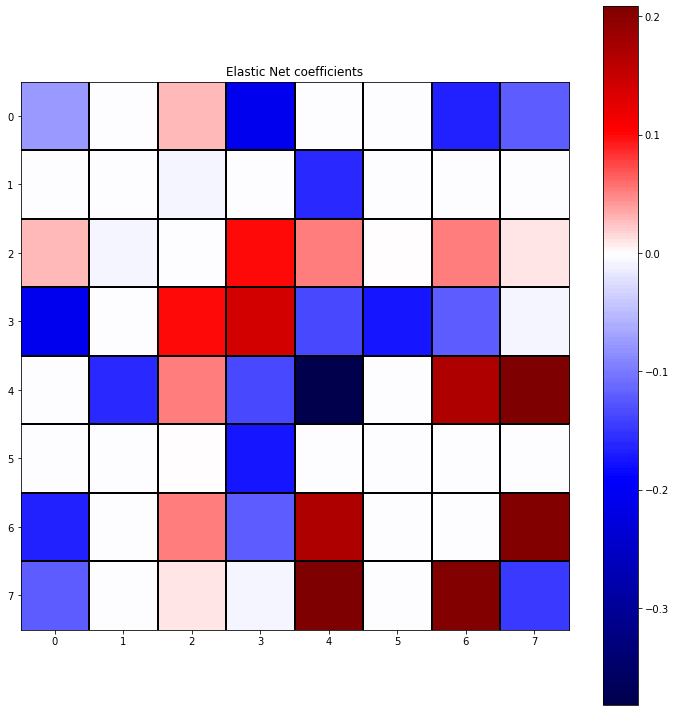

In [6]:
plot_coef_elastic_net(model)

# Feature Importance

In [9]:
from src.visualization.viz_utils import plot_grouped_FI
from src.visualization.group_imp import grouped_permutation_FI, group_only_permutation_FI

In [10]:
  ind_conn_cols = []
  for x in range(len(model.feature_names_in_)):
    if len(model.feature_names_in_[x].split("_"))>1 and model.feature_names_in_[x].split("_")[0].isdigit() and model.feature_names_in_[x].split("_")[1].isdigit():
      ind_conn_cols.append(x)

In [18]:
groups_df = pd.DataFrame({'conn_name': model.feature_names_in_[ind_conn_cols], 'region': model.feature_names_in_[ind_conn_cols]})

In [19]:
df_importance = grouped_permutation_FI(model, Xtest, ytest, groups_df, m = 10)

In [20]:
df_importance.head()

,region,mean decrease accuracy
0,0_0,-0.008511
1,0_1,0.000000
2,0_2,-0.005319
3,0_3,-0.013830
4,0_4,0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


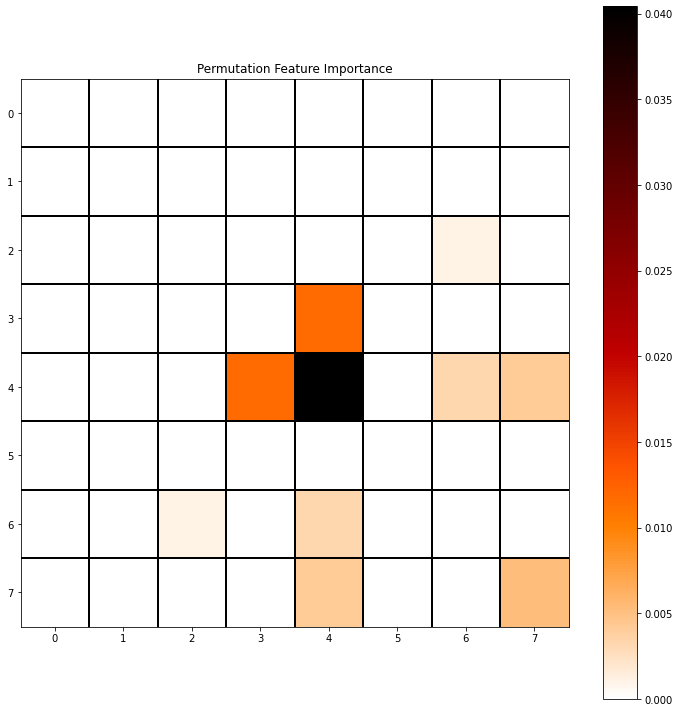

In [29]:
plot_grouped_FI(df_importance, title = "Permutation Feature Importance")

In [22]:
df_importance_only = group_only_permutation_FI(model, Xtest, ytest, groups_df, m = 10)

In [24]:
df_importance_only.head()

,region,mean decrease accuracy
0,0_0,0.001064
1,0_1,0.000000
2,0_2,-0.001064
3,0_3,0.011702
4,0_4,0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


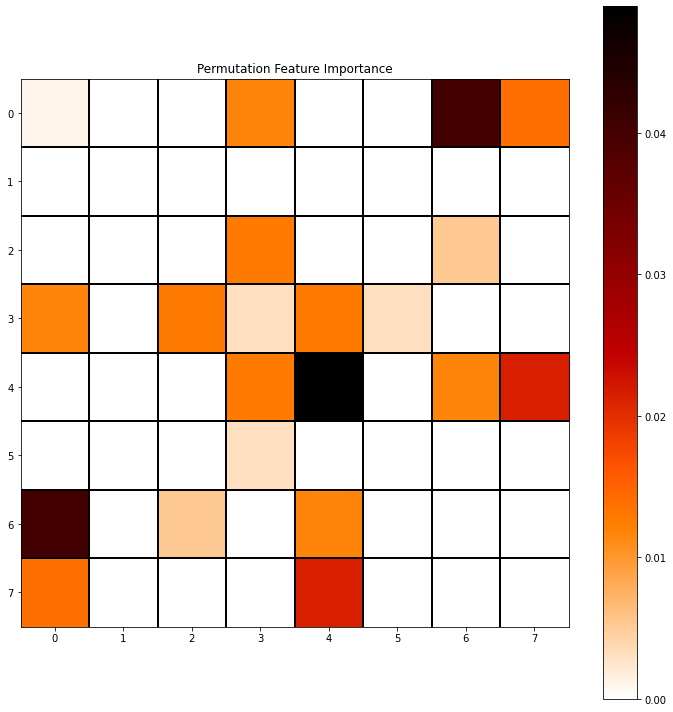

In [28]:
plot_grouped_FI(df_importance_only, title = "Permutation Feature Importance")